In [13]:
"""
This script is used to generate a dataset of the Fdd solution for the PINN training.

The settings.json file is used to configure the material and process parameters of the dataset.    
    
"""

'\nThis script is used to generate a dataset of the Fdd solution for the PINN training.\n\nThe settings.json file is used to configure the material and process parameters of the dataset.    \n    \n'

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json


from simdata_mush_dirc import HT_sim


In [ ]:

# length = 15e-3
# time_end = 40.0
# numpoints = 50
# temp_init = 919.0
# t_surr = 500.0

with open('settings.json') as file:
    settings = json.load(file)

heat_data = HT_sim(settings)
alpha = heat_data.alpha_l
tempfield = heat_data.datagen()

dt = heat_data.dt  

The spatial step is 0.00020408163265306123
The time step is 0.00014676749271137028


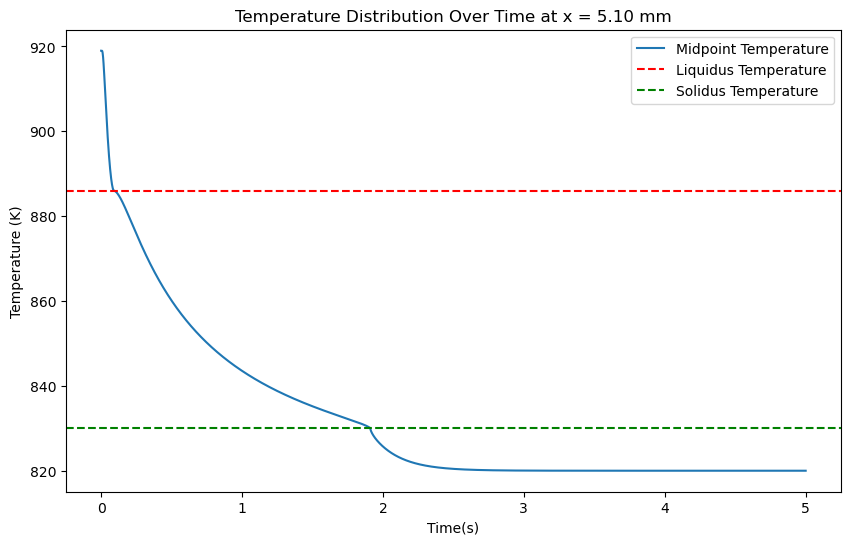

In [16]:
heat_data.plot_temp(25)

### Convert the file to csv

In [17]:
print(type(tempfield))

temp= tempfield.ravel()
sp = heat_data.space_time()[0]
x = sp.ravel()

tm = heat_data.space_time()[1]
t = tm.ravel()

dataset= np.column_stack((x,t,temp))

with open('heat_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['x', 't', 'temp'])
    writer.writerows(dataset)





<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Temperature Field')

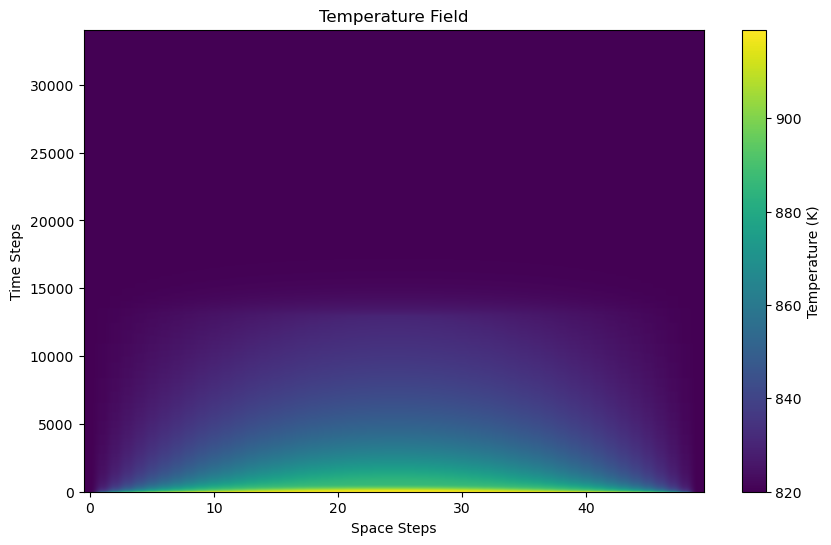

In [18]:
# plot tempfield

plt.figure(figsize=(10, 6))
plt.imshow(tempfield, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Temperature (K)')
plt.xlabel('Space Steps')
plt.ylabel('Time Steps')
plt.title('Temperature Field')



